In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
train_df=pd.read_csv("fraudTrain.csv")
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
test_df=pd.read_csv("fraudTest.csv")
test_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
combined_df=pd.concat([train_df, test_df], ignore_index=True)
data=combined_df

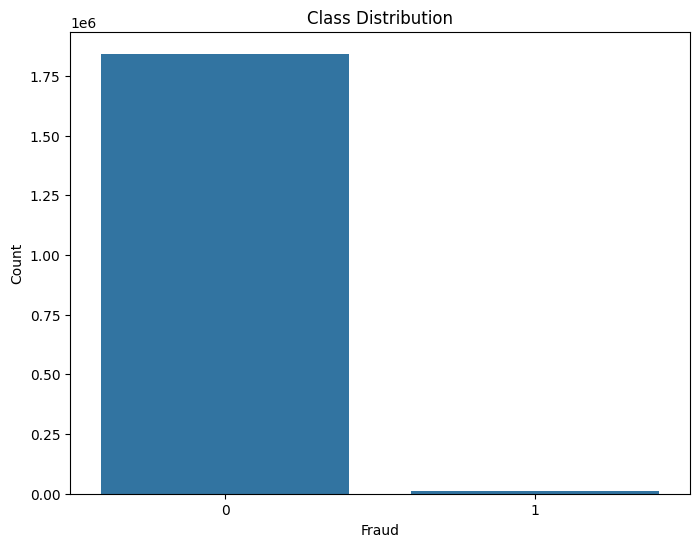

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=data)
plt.title('Class Distribution')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()

In [8]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['hour'] = data['trans_date_trans_time'].dt.hour
data['day_of_week'] = data['trans_date_trans_time'].dt.dayofweek
data['month'] = data['trans_date_trans_time'].dt.month
data = data.drop(['Unnamed: 0', 'trans_date_trans_time', 'merchant', 'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num'], axis=1)
data = pd.get_dummies(data, columns=['category'], drop_first=True)


data['gender'] = data['gender'].map({'M': 0, 'F': 1})


X = data.drop(['is_fraud'], axis=1)
y = data['is_fraud']
scaler = StandardScaler()
numerical_columns = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [9]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


rf_classifier = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)



y_pred = rf_classifier.predict(X_val)


print("Classification Report:")
print(classification_report(y_val, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_val, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    276443
           1       0.78      0.77      0.78      1416

    accuracy                           1.00    277859
   macro avg       0.89      0.89      0.89    277859
weighted avg       1.00      1.00      1.00    277859

ROC-AUC Score: 0.8861063176538616


In [12]:
from collections import Counter
print("Original Class Distri.")
print(Counter(y_train))
print("Resampled Class Distri.")
print(Counter(y_train_resampled))

Original Class Distri.
Counter({0: 1289962, 1: 6713})
Resampled Class Distri.
Counter({0: 1289962, 1: 644981})


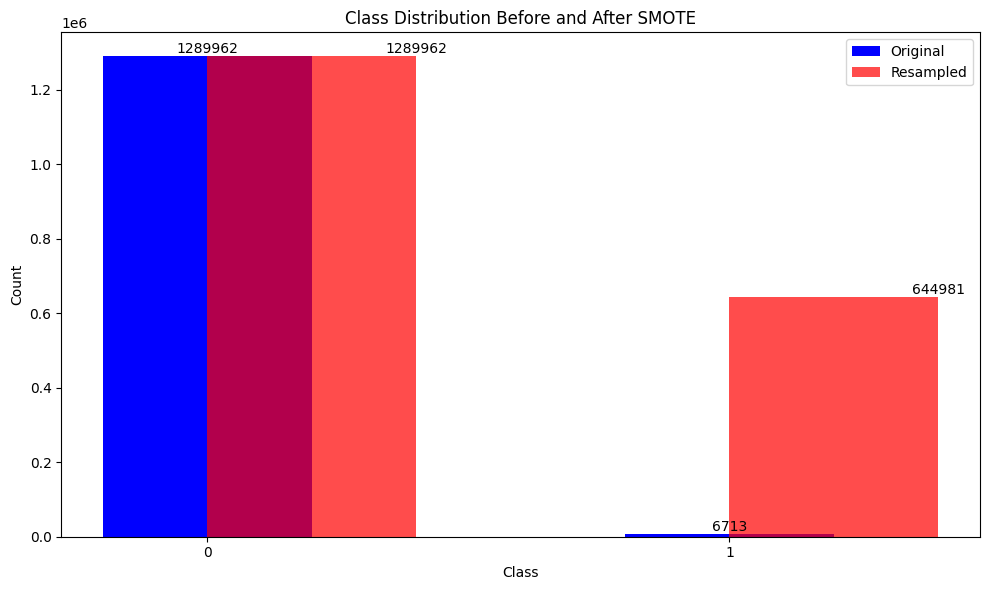

In [9]:
import matplotlib.pyplot as plt
from collections import Counter

original_distribution = Counter(y_train)
resampled_distribution = Counter(y_train_resampled)
class_labels = list(original_distribution.keys())


original_counts = [original_distribution[label] for label in class_labels]
resampled_counts = [resampled_distribution[label] for label in class_labels]

plt.figure(figsize=(10, 6))
bar_width = 0.4
index = range(len(class_labels))

plt.bar(index, original_counts, width=bar_width, color='b', label='Original', align='center')
plt.bar(index, resampled_counts, width=bar_width, color='r', label='Resampled', alpha=0.7, align='edge')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution Before and After SMOTE')
plt.xticks(index, class_labels)
plt.legend()
plt.tight_layout()


for i, count in enumerate(original_counts):
    plt.text(i, count + 20, str(count), ha='center', va='bottom', fontsize=10, color='black')

for i, count in enumerate(resampled_counts):
    plt.text(i + bar_width, count + 20, str(count), ha='center', va='bottom', fontsize=10, color='black')

plt.show()

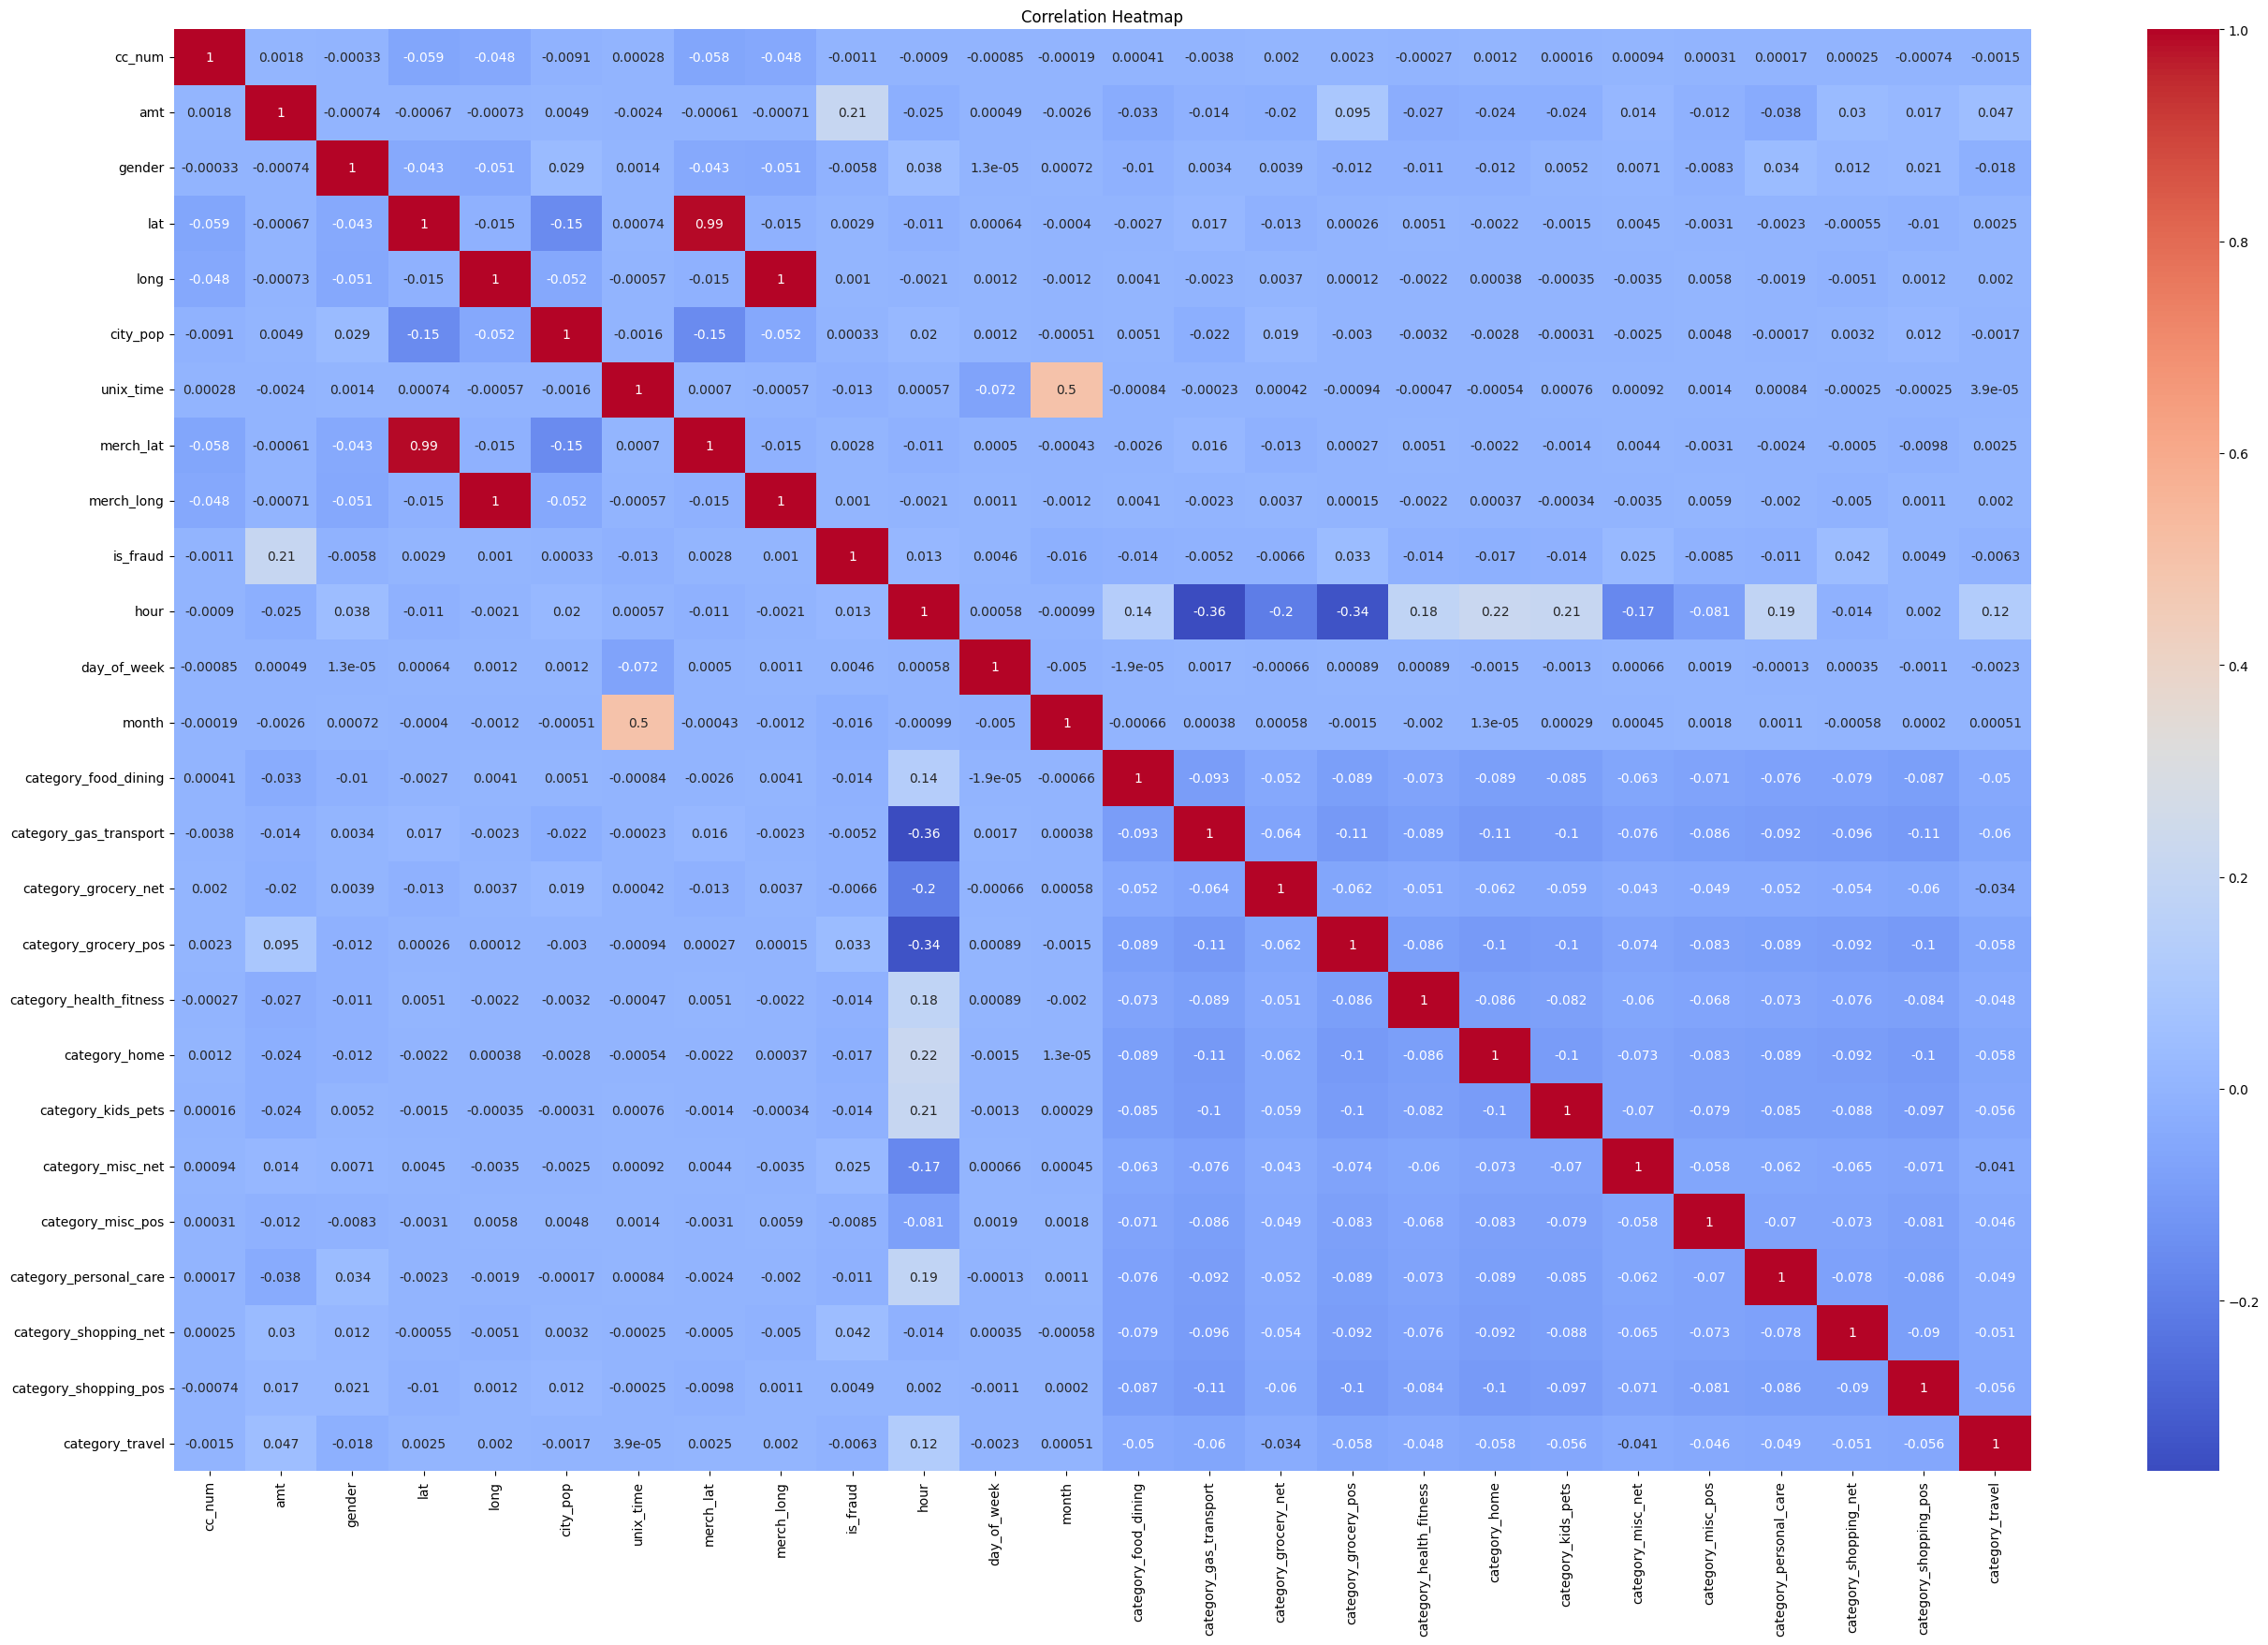

In [10]:
plt.figure(figsize=(32, 20))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

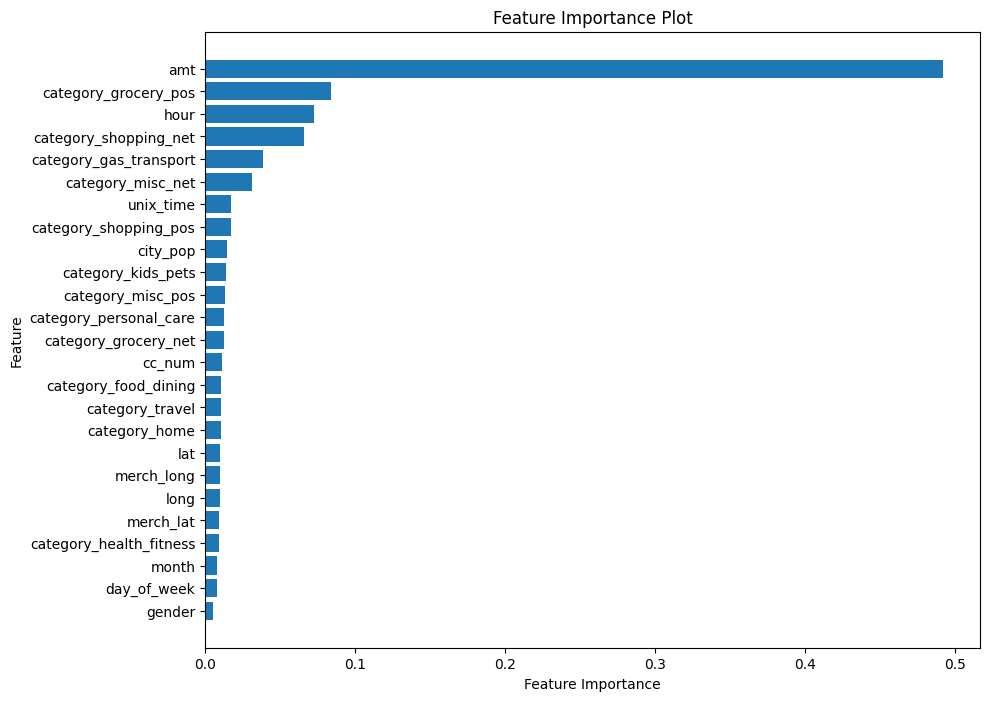

In [11]:
feature_importances = rf_classifier.feature_importances_
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 8))
plt.barh(range(X_train.shape[1]), feature_importances[sorted_idx], align='center')
plt.yticks(range(X_train.shape[1]), X_train.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

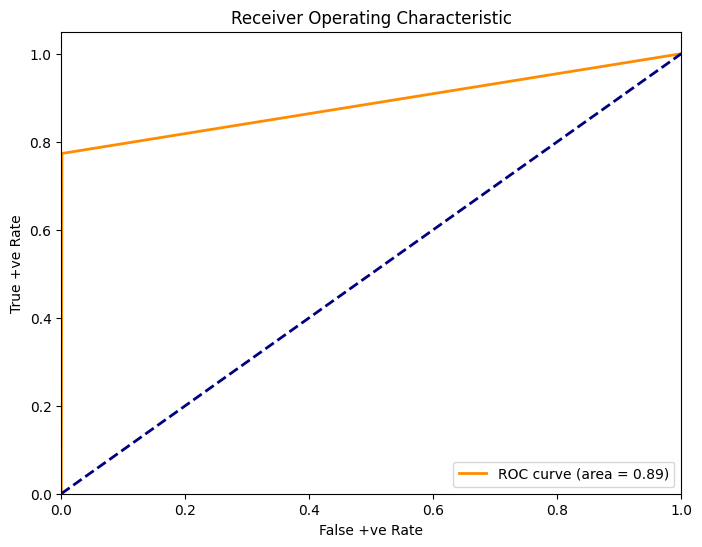

In [10]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False +ve Rate')
plt.ylabel('True +ve Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()